In [33]:
using CUDA
using Plots, Images, TestImages
using Flux
using Random

include("my_utils.jl")

imshow (generic function with 1 method)

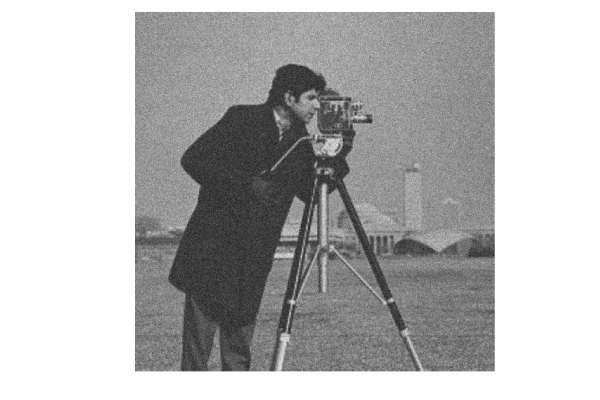

In [34]:
img = Float64.(Gray.(testimage("cameraman")))
img_n = img + 0.1*randn(size(img))
imshow(img_n)

In [ ]:
#m = unet512() |> gpu
m = dncnn() |> gpu
T = (5, 5)  # mask periods
θ = params(m)
opt = ADAM(1e-2)

data = make_data(img_n, T) |> gpu;

In [37]:
img_g = img |> gpu 
cc() = psnr(img_g, J_func(data, m))

println("> initial PSNR = ", psnr(img, img_n))
for n_epoch in 1:300
    n_epoch%50 == 0 && println("> epoch: ", n_epoch, ", PSNR = ", cc())
    for n_mask in 1:prod(T) # randperm(prod(T))
        loss(x, y) = Flux.Losses.mse(data[n_mask][3].*m(x), y)
        Flux.train!(loss, θ, [(data[n_mask][1], data[n_mask][2])], opt)
    end
end

> initial PSNR = 39.99424641462454
> epoch: 50, PSNR = 49.3744
> epoch: 100, PSNR = 49.705696
> epoch: 150, PSNR = 48.677788
> epoch: 200, PSNR = 49.94744
> epoch: 250, PSNR = 50.38038
> epoch: 300, PSNR = 50.355263


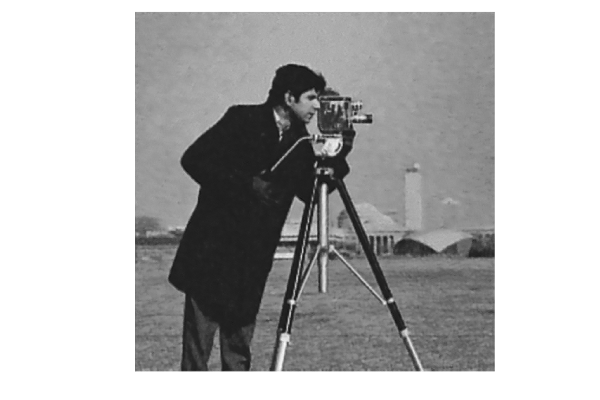

In [38]:
res_j = J_func(data, m)[:,:,1,1] |> cpu
imshow(res_j)